In [1]:
# !pip install tensorflow
# !pip install keras
import tensorflow
import keras

In [2]:
keras.__version__ , tensorflow.__version__

('2.4.3', '2.3.0')

In [34]:
from keras.datasets import mnist

(train_images, train_label),(test_images, test_label) = mnist.load_data()

흑백 숫자 이미지 
이미지는 넘파이 배열로 인코딩 되어 있고, 레이블은 0~9 까지 숫자 배열이다.
이미지와 레이블은 1:1 관계.

In [35]:
train_images.shape   , test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [36]:
train_images[0]    #첫번째 이미지 // 숫자가 높을수록 블랙에 가까워 진다.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [37]:
len(train_label) , len(test_label)

(60000, 10000)

In [38]:
train_label[0] , train_label[1]  #첫번째 손글씨는 5, 두번째 손글씨는 0 이라는 의미

(5, 0)

In [39]:
print(train_label)
print(test_label)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [40]:
# 맷플롯립 라이브러리를 사용해서 확인
import matplotlib.pyplot as plt

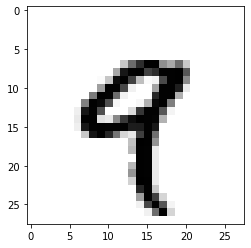

In [41]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)    #cmap=plt.cm.binary : 흑백 출력
plt.show()

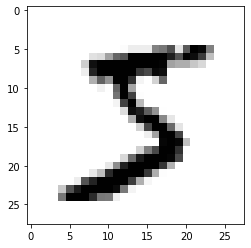

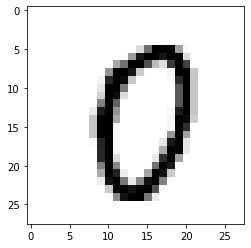

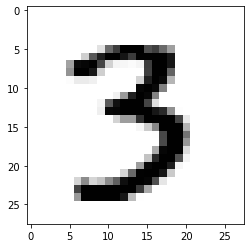

In [42]:
# 0번째, 1000번째, 10000번째 이미지 출력

numbers = [0, 1000, 10000]

for i in numbers:
    digit=train_images[i]
    
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()

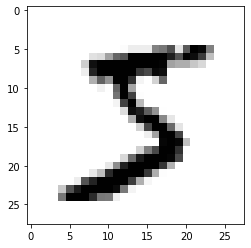

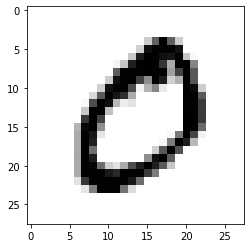

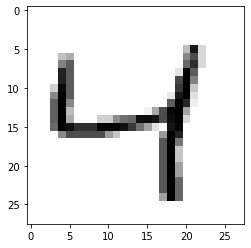

In [43]:
# 0,1,2번째 해당하는 3개의 인덱스 출력

i = 0

while i<3:
    digit = train_images[i]
    i=i+1
    
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()

In [44]:
train_images.min(),train_images.max()

(0, 255)

모델 신경망 만들기.
이미지와 레이블을 연관시킬수 있도록 학습. test_images에 대한 예측을 네트워크에 요청.
예측이 test_label과 맞는지 확인.

In [45]:
from keras import models , layers

In [46]:
network = models.Sequential()   #레이어 층층이 쌓기

#첫번째 network add  #28*28=784만큼의 입력 데이터가 들어감. # 히든레이어 512로 가져가기 -> relu활성함수 써서 다음층으로 넘기기
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 

# 10개의 노트를 가지고 softmax 활성함수를 통해서 앞으로 출력을 뽑아라.
network.add(layers.Dense(10, activation='softmax'))

네크워크 훈련 직전단계

최적화 함수 : rmsprop \
손실함수 : categorical_crossentropy  (신경망 성능 측정 방법으로 옳은 방향으로 학습 될수 있도록 도와준다.) \
성능척도 : accuracy

In [47]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
               metrics=['accuracy'])  #정확도

In [48]:
# 훈련 시작전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과1 사이로 스케일 조정.

train_images = train_images.reshape((60000,28*28))    #가로,세로를 없애고 한줄로 늘어 놓는다는 의미
train_images = train_images.astype('float32') / 255         #train_images = 0~255 사이인 값. // 데이터를  0과1사이의 값으로 조정 하려면 255 나눠야함.

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

In [49]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [50]:
# 레이블을 범주형으로 인코딩 하기 (one hot encoding 안에서 자동으로 만들어 준다.)
from keras.utils import to_categorical

train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [51]:
train_label[0]  #onehotencoding을 통해 index 5자리의 값만 1이 되도록 함.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

신경망 훈련시킬 준비 완료. 케라스에서 fit 호출하여 훈련 데이터에 모델 학습을 시킨다 

In [52]:
# epoch : 몇번 훈련 시킬지 정하는 것임.
#batch_size : 몇개씩 잘라서 훈련 시킬 건지 정하는 것.
network.fit(train_images, train_label, epochs=5, batch_size=128)   #5번 돌려 훈련 시키는데 128개씩 잘라서 5번 진행한다는 의미

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2607 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1055 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0686 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0505 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0378 - accuracy: 0.9883


훈련데이터 정확도 : 98% 달성

In [53]:
# 테스트 데이터 신경망 훈련시키기
test_loss, test_acc = network.evaluate(test_images, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0722 - accuracy: 0.9781


In [54]:
print('test_acc :', test_acc)

test_acc : 0.9781000018119812


10000개의 test데이터 acc=97.8% 정도가 나옴.